# Generatives Trainig mit DeepHull loss, generatives und normales Netz trainieren unabhängig voneinander

In [1]:
import numpy as np
import torch

from script.NeuralNets.Networks import ICNN
from script.NeuralNets.Networks import SequentialNN
from torch.utils.data import DataLoader
from script.dataInit import ConvexDataset, Rhombus
from script.NeuralNets.trainFunction import train_icnn_adversarial, train_icnn
from script.eval import Plots_for

In [2]:
icnn = ICNN([2, 10, 10, 1])
adversarial = SequentialNN([2, 10, 10, 2])
epochs = 5
batch_size = 1

number_of_adversarial_samples = 1000
number_of_train_samples = 10000
hyper_lambda = 1
x_range = [-1.5, 1.5]
y_range = [-1.5, 1.5]

In [3]:
included_space, ambient_space = Rhombus().get_uniform_samples(number_of_train_samples, x_range, y_range) #samples will be split in inside and outside the rhombus
true_extremal_points = Rhombus().get_extremal_points()
dataset = ConvexDataset(data=included_space)
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
dataset = ConvexDataset(data= ambient_space)
ambient_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [4]:
random_samples = []
for i in range(number_of_adversarial_samples): # generate random samples
    x = np.random.default_rng().uniform(low=x_range[0], high=x_range[1])
    y = np.random.default_rng().uniform(low=y_range[0], high=y_range[1])
    random_samples.append([[x, y]])

value = torch.tensor(random_samples, requires_grad=True, dtype=torch.float64)
adversarial_set = ConvexDataset(data=value)
adversarial_loader = DataLoader(adversarial_set, batch_size=batch_size, shuffle=True)


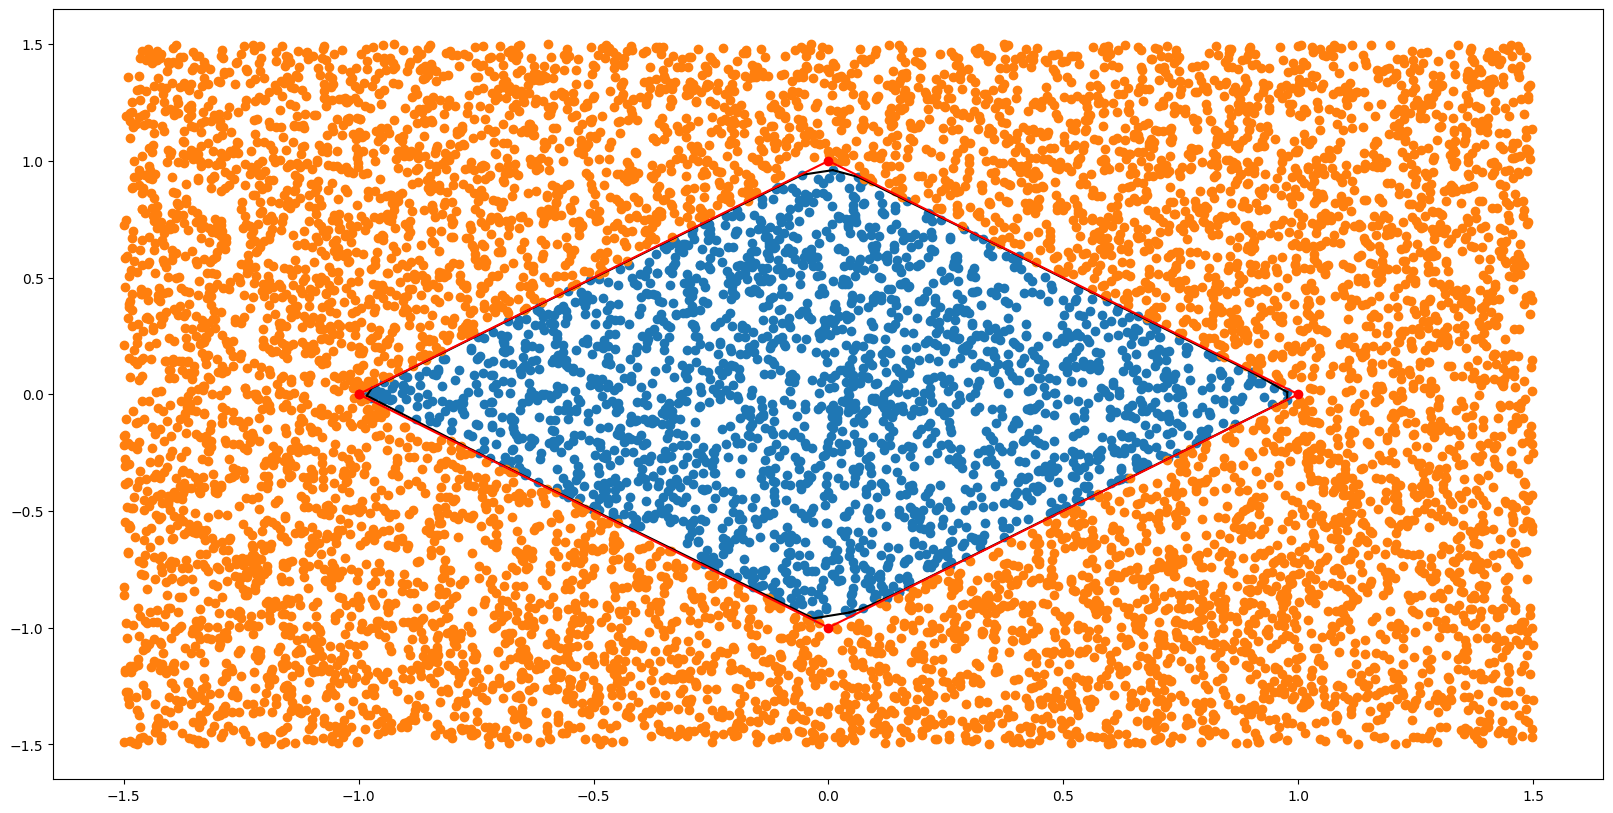

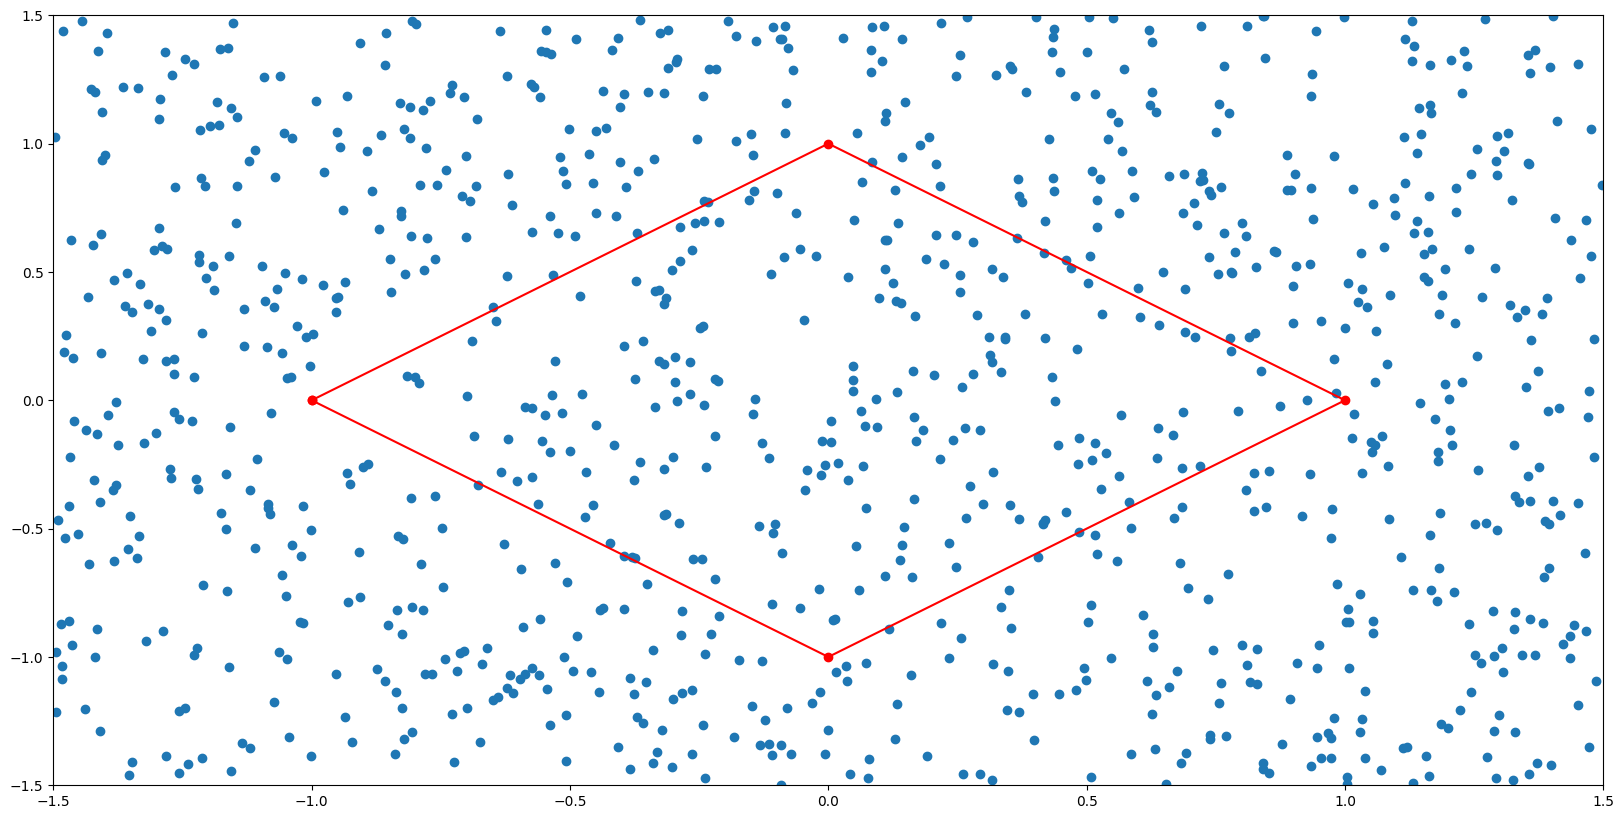

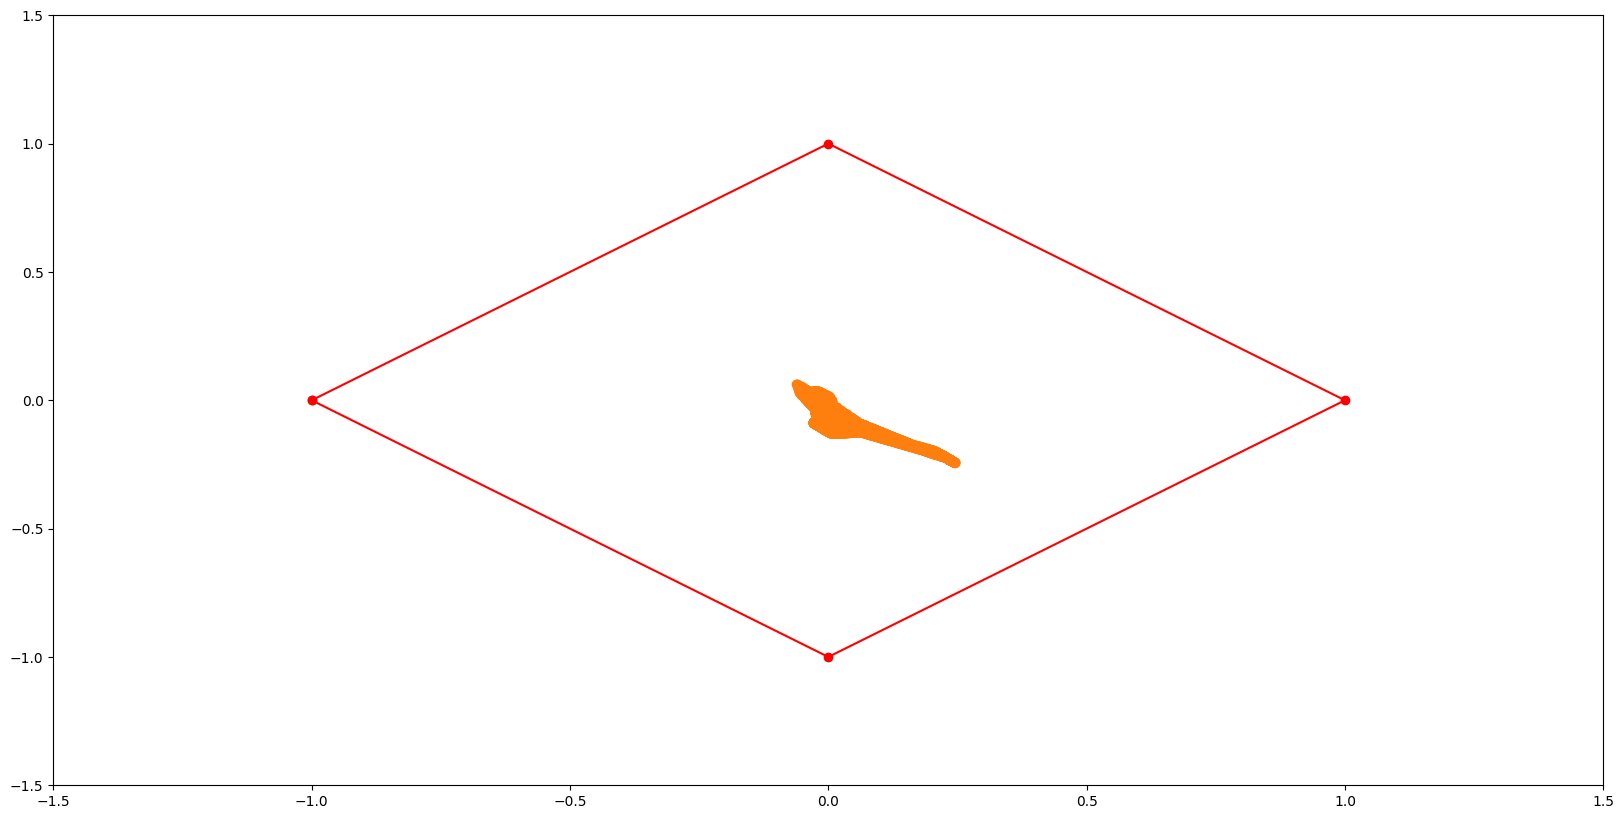

In [5]:
plots = Plots_for(0, icnn, included_space, ambient_space, x_range, y_range, extr=true_extremal_points, adversarial=adversarial, adversarial_values=value)
plots.plt_initial()

plots.plt_adversarial_initial()
plots.plt_adversarial_dotted()


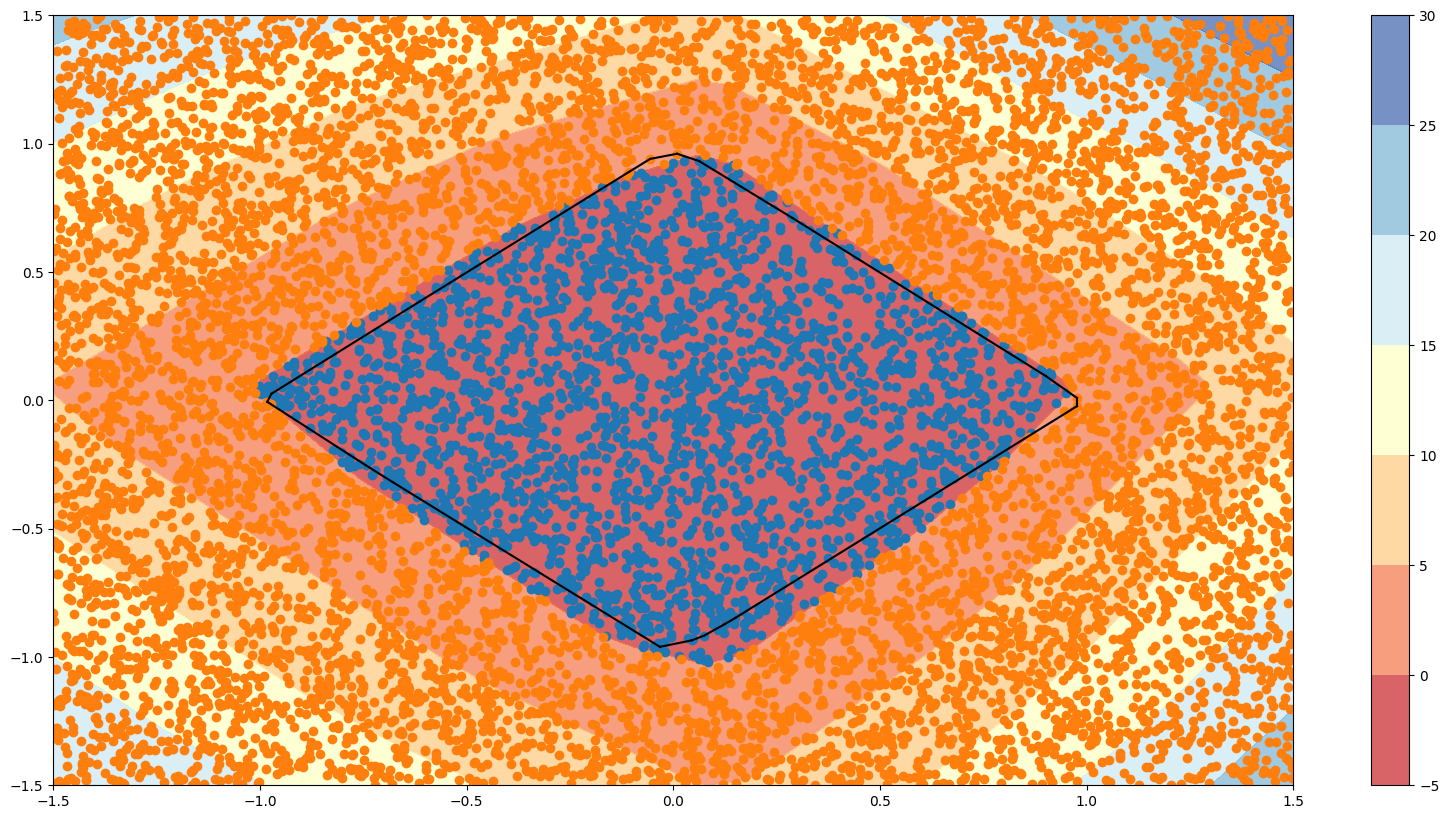

In [6]:
history = train_icnn(icnn, train_loader, ambient_loader, epochs=epochs, hyper_lambda=hyper_lambda)
plots.plt_mesh()

In [8]:
history = train_icnn_adversarial(icnn, adversarial, train_loader, adversarial_loader, epochs=epochs, train_icnn=False, hyper_lambda=hyper_lambda)

=== Epoch: 0===
batch = 0, mean loss = 3.7689516730958115, l_pos = 0.01814320153505038, l_neg = 3.726737224641183, l_gen = 0.024071246919578106
batch = 100, mean loss = 3.5549259447704626, l_pos = 0.11248129016764978, l_neg = 3.402257093632203, l_gen = 0.040187560970610374
batch = 200, mean loss = 2.3717742442836323, l_pos = 0.11163372515530288, l_neg = 1.8231500878817626, l_gen = 0.4369904312465684
batch = 300, mean loss = 1.9476805509708783, l_pos = 0.10529068942430317, l_neg = 1.2354941465283333, l_gen = 0.6068957150182427
batch = 400, mean loss = 1.7370027512682267, l_pos = 0.10440816995346405, l_neg = 0.9356470920943059, l_gen = 0.6969474892204579
batch = 500, mean loss = 1.6100583448566683, l_pos = 0.10358620973309601, l_neg = 0.7540313274636493, l_gen = 0.7524408076599237
batch = 600, mean loss = 1.5282522066681536, l_pos = 0.10593446195731601, l_neg = 0.6329960830650996, l_gen = 0.7893216616457387
batch = 700, mean loss = 1.4676395033286112, l_pos = 0.10549614682812987, l_neg =

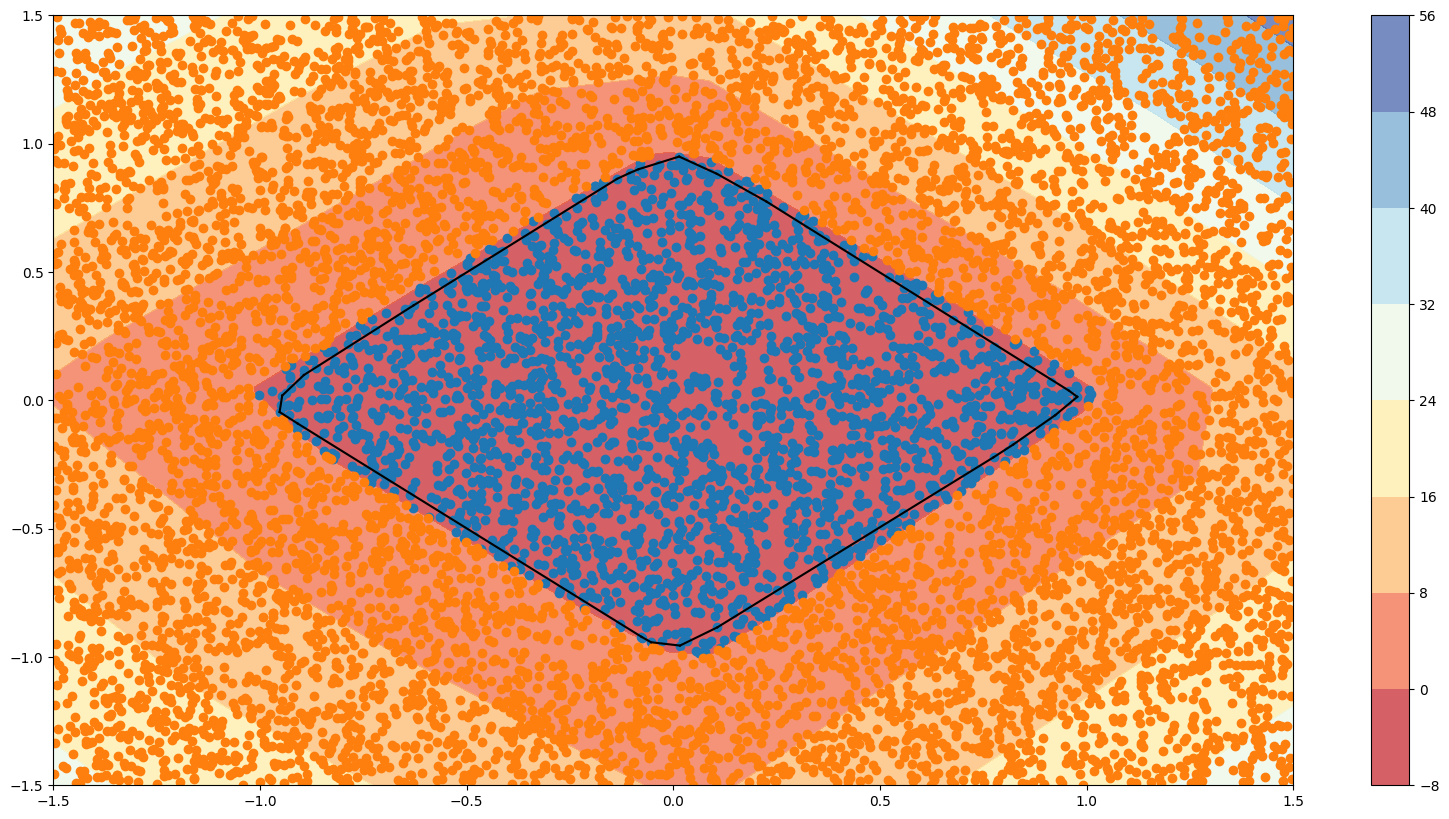

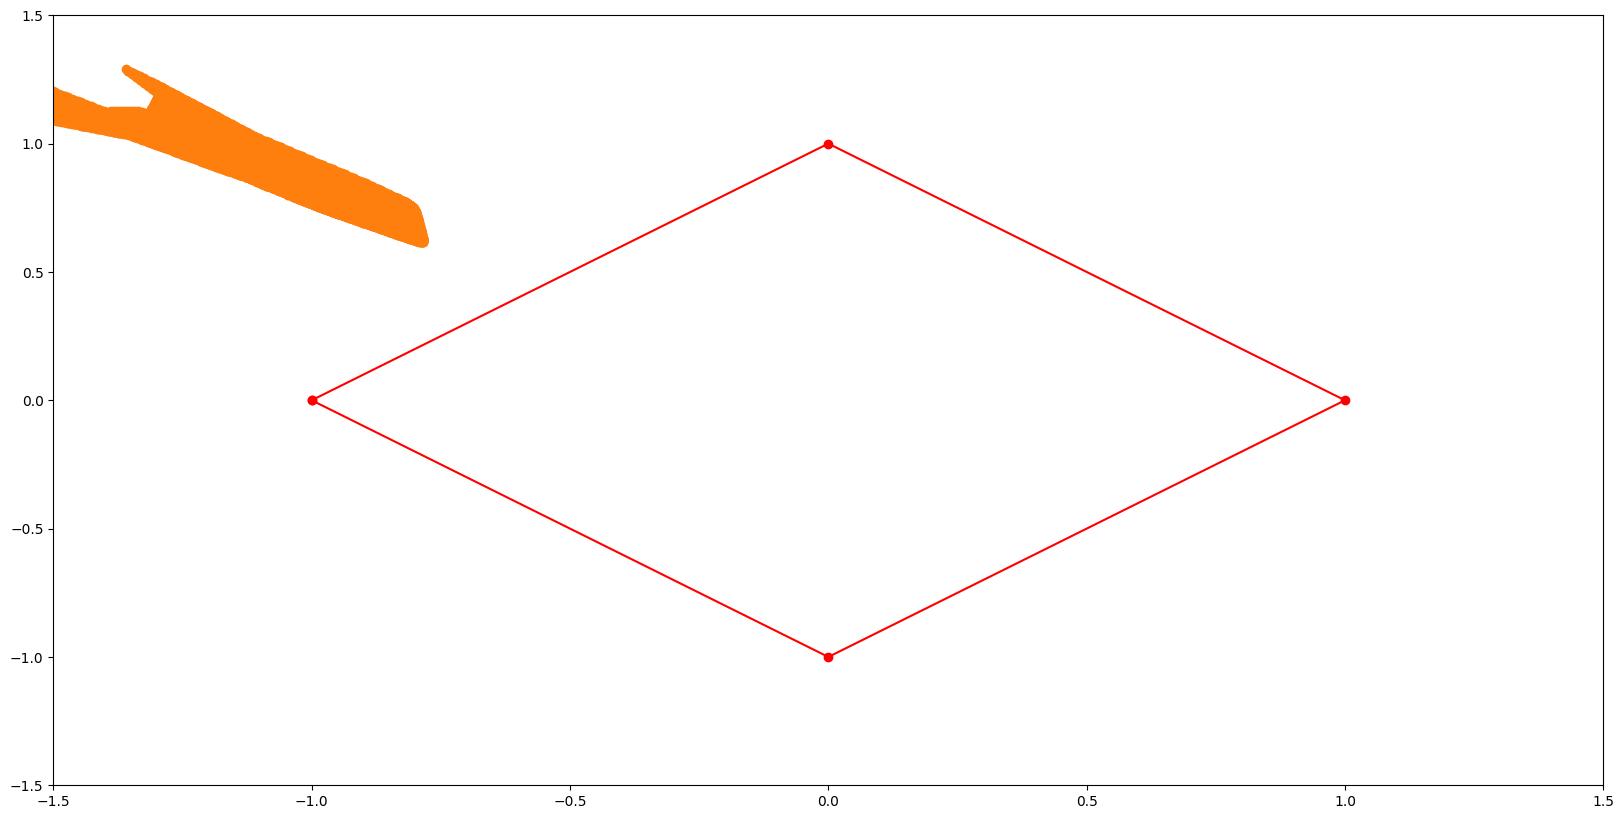

In [8]:
plots.plt_mesh()
plots.plt_adversarial_dotted()